# GNSS

In [ ]:
file_output0_path = '/content/output0.nmea'
file_output1_path = '/content/output1.nmea'

# Reading the contents of the files
with open(file_output0_path, 'r') as file_output0:
    output0_content = file_output0.readlines()

with open(file_output1_path, 'r') as file_output1:
    output1_content = file_output1.readlines()




['$GPGGA,070450.345,4729.902,N,01902.426,E,1,12,1.0,0.0,M,0.0,M,,*63\n',
 '$GPGSA,A,3,01,02,03,04,05,06,07,08,09,10,11,12,1.0,1.0,1.0*30\n',
 '$GPRMC,070450.345,A,4729.902,N,01902.426,E,958.3,079.2,031120,000.0,W*7D\n',
 '$GPGGA,070451.345,4729.974,N,01902.805,E,1,12,1.0,0.0,M,0.0,M,,*6E\n',
 '$GPGSA,A,3,01,02,03,04,05,06,07,08,09,10,11,12,1.0,1.0,1.0*30\n',
 '$GPRMC,070451.345,A,4729.974,N,01902.805,E,958.3,079.2,031120,000.0,W*70\n']

In [ ]:
output1_content[:5]

['$GPGGA,070450.345,4728.344,N,01903.787,E,1,12,1.0,0.0,M,0.0,M,,*63\n',
 '$GPGSA,A,3,01,02,03,04,05,06,07,08,09,10,11,12,1.0,1.0,1.0*30\n',
 '$GPRMC,070450.345,A,4728.344,N,01903.787,E,009.7,082.8,031120,000.0,W*7A\n',
 '$GPGGA,070451.345,4728.345,N,01903.791,E,1,12,1.0,0.0,M,0.0,M,,*64\n',
 '$GPGSA,A,3,01,02,03,04,05,06,07,08,09,10,11,12,1.0,1.0,1.0*30\n']

In [ ]:
file_output0_path = '/content/output0.nmea'


# Reading the contents of the file
with open(file_output0_path, 'r') as file_output0:
    output0_content = file_output0.readlines()


def nmea_to_decimal_safe(degree_min, direction):
    """
    Safely convert NMEA format (DDDMM.MMMM) to decimal degrees.
    Skips conversion if data is invalid.
    """
    try:
        # Ensure degree_min is not empty
        if not degree_min:
            return None

        # Split into degrees and minutes
        degrees = int(degree_min[:-7])  # Take all but last 7 digits as degrees
        minutes = float(degree_min[-7:])  # Take last 7 digits as minutes
        decimal = degrees + (minutes / 60)

        # Apply hemisphere direction
        if direction in ['S', 'W']:
            decimal = -decimal

        return decimal
    except (ValueError, IndexError):
        # Return None if conversion fails
        return None

def extract_coordinates_safe_v2(nmea_lines):
    """
    Extract GPS coordinates from NMEA lines with $GPGGA or $GPRMC messages.
    Returns a list of tuples: [(latitude, longitude), ...].
    Skips lines with missing or invalid data.
    """
    coordinates = []
    for line in nmea_lines:
        if line.startswith('$GPGGA') or line.startswith('$GPRMC'):
            parts = line.split(',')
            print(parts)
            if len(parts) > 6:
                # Extract latitude and longitudecoordinates_output1[:5]   safely
                lat = nmea_to_decimal_safe(parts[2], parts[3])  # Latitude and direction (N/S)
                lon = nmea_to_decimal_safe(parts[4], parts[5])  # Longitude and direction (E/W)
                if lat is not None and lon is not None:
                    coordinates.append((lat, lon))
    return coordinates

# Process both files again with the updated functions
coordinates_output0 = extract_coordinates_safe_v2(output0_content)

# Display the extracted coordinates
coordinates_output0


['$GPGGA', '070450.345', '4729.902', 'N', '01902.426', 'E', '1', '12', '1.0', '0.0', 'M', '0.0', 'M', '', '*63\n']
['$GPRMC', '070450.345', 'A', '4729.902', 'N', '01902.426', 'E', '958.3', '079.2', '031120', '000.0', 'W*7D\n']
['$GPGGA', '070451.345', '4729.974', 'N', '01902.805', 'E', '1', '12', '1.0', '0.0', 'M', '0.0', 'M', '', '*6E\n']
['$GPRMC', '070451.345', 'A', '4729.974', 'N', '01902.805', 'E', '958.3', '079.2', '031120', '000.0', 'W*70\n']


[(16.165033333333334, 16.040433333333333), (16.166233333333334, 16.04675)]

In [ ]:
coordinates_output1[:5]

[(16.13906666666667, 16.063116666666666),
 (16.139083333333332, 16.063183333333335),
 (16.139083333333332, 16.06325),
 (16.139049999999997, 16.063266666666667),
 (16.139000000000003, 16.063283333333334)]

In [ ]:
!pip install -c conda-forge basemap


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


In [ ]:
file_output1_path = '/content/output1.nmea'

with open(file_output1_path, 'r') as file_output1:
    output1_content = file_output1.readlines()

coordinates_output1 = extract_coordinates_safe_v2(output1_content)


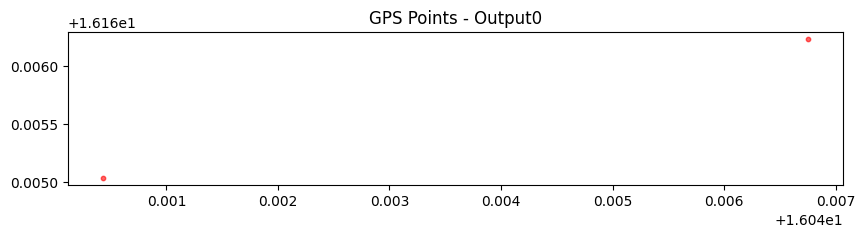

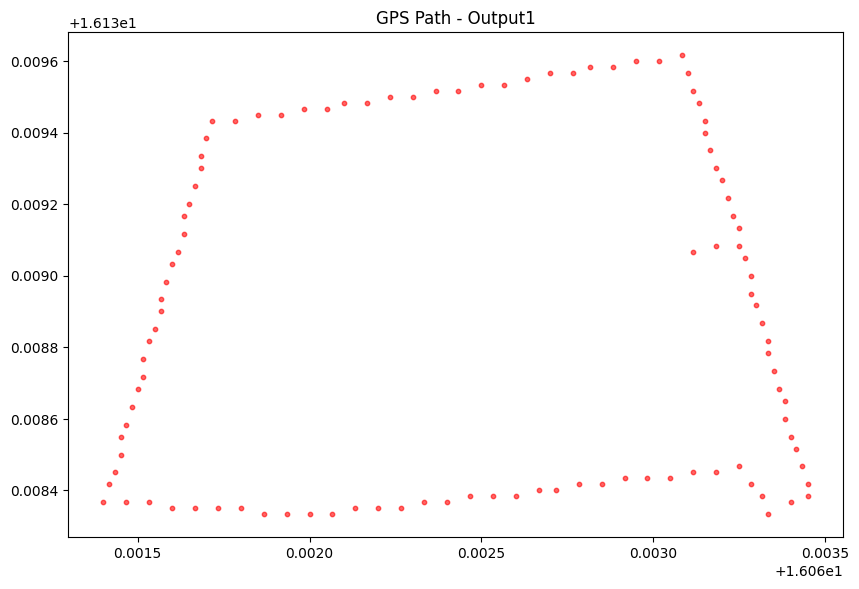

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Function to create a GeoDataFrame from coordinates
def create_geodataframe(coordinates):
    """
    Create a GeoDataFrame from a list of latitude and longitude coordinates.
    - coordinates: List of (latitude, longitude) tuples.
    """
    # Convert to a GeoDataFrame
    df = pd.DataFrame(coordinates, columns=["Latitude", "Longitude"])
    geometry = [Point(lon, lat) for lat, lon in coordinates]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS84

    return gdf

# Convert coordinates to GeoDataFrames
gdf_output0 = create_geodataframe(coordinates_output0)
gdf_output1 = create_geodataframe(coordinates_output1)

# Plot the GeoDataFrames
def plot_geodataframe(gdf, title, save_path):
    """
    Plot a GeoDataFrame on a map.
    - gdf: GeoDataFrame containing points to plot.
    - title: Title of the map.
    - save_path: Path to save the map image.
    """
    base = gdf.plot(figsize=(10, 8), color="red", markersize=10, alpha=0.6)
    plt.title(title)
    plt.savefig(save_path)
    plt.show()

# Plot the maps
plot_geodataframe(gdf_output0, "GPS Points - Output0", "output0_map_geopandas.png")
plot_geodataframe(gdf_output1, "GPS Path - Output1", "output1_map_geopandas.png")


In [ ]:
import folium

# Function to create a Folium map from coordinates
def create_folium_map(coordinates, title, save_path):
    """
    Create an interactive Folium map from GPS coordinates.
    - coordinates: List of (latitude, longitude) tuples.
    - title: Title of the map (used for file name and display).
    - save_path: Path to save the map as an HTML file.
    """
    # Initialize the map at the first coordinate
    if not coordinates:
        return None
    map_center = coordinates[0]
    folium_map = folium.Map(location=map_center, zoom_start=15, control_scale=True)

    # Add points to the map
    for coord in coordinates:
        folium.Marker(location=coord).add_to(folium_map)

    # Save the map to an HTML file
    folium_map.save(save_path)
    return folium_map

# Create maps for Output0 and Output1
output0_map_path = 'output0_map_folium.html'
output1_map_path = 'output1_map_folium.html'

folium_map_output0 = create_folium_map([(lat, lon) for lat, lon in coordinates_output0],
                                       "GPS Points - Output0", output0_map_path)
folium_map_output1 = create_folium_map([(lat, lon) for lat, lon in coordinates_output1],
                                       "GPS Path - Output1", output1_map_path)

# Display map file paths for download
output0_map_path, output1_map_path


('output0_map_folium.html', 'output1_map_folium.html')

In [ ]:
import folium

# Define the path of the uploaded file
file_path = '/content/output0.nmea'

# Function to extract GPS coordinates from GGA and RMC sentences
def extract_coordinates(file_path):
    coordinates = []
    with open(file_path, 'r') as file:
        for line in file:
            if "$GPGGA" in line or "$GPRMC" in line:
                parts = line.split(",")
                if len(parts) > 6:
                    # Latitude
                    raw_lat = parts[2]
                    lat_dir = parts[3]
                    # Longitude
                    raw_lon = parts[4]
                    lon_dir = parts[5]

                    # Ensure the fields are valid before processing
                    if raw_lat.replace('.', '', 1).isdigit() and raw_lon.replace('.', '', 1).isdigit():
                        # Convert to decimal degrees
                        lat = float(raw_lat[:2]) + float(raw_lat[2:]) / 60.0
                        lon = float(raw_lon[:3]) + float(raw_lon[3:]) / 60.0
                        if lat_dir == "S":
                            lat = -lat
                        if lon_dir == "W":
                            lon = -lon
                        coordinates.append((lat, lon))
    return coordinates

# Extract coordinates from GGA and RMC sentences
coordinates = extract_coordinates(file_path)
print("GPS Coordinates", coordinates)
# Create and save the map for the extracted coordinates
if coordinates:
    gps_map = folium.Map(location=coordinates[0], zoom_start=15)
    for coord in coordinates:
        folium.Marker(location=coord, popup=f"Lat: {coord[0]}, Lon: {coord[1]}").add_to(gps_map)
    gps_map_path = 'gps_map.html'
    gps_map.save(gps_map_path)
    print(f"GPS Map saved at: {gps_map_path}")
else:
    print("No GPS coordinates found.")


GPS Coordinates [(47.49836666666667, 19.040433333333333), (47.49956666666667, 19.04675)]
GPS Map saved at: gps_map.html


In [ ]:
import webbrowser

# Generate Google Maps URL for the coordinates
def generate_google_maps_url(lat, lon):
    return f"https://www.google.com/maps?q={lat},{lon}"

# Coordinates to open in Google Maps
urls = [generate_google_maps_url(lat, lon) for lat, lon in coordinates]

# Open each location in the web browser
for url in urls:
    webbrowser.open(url)

urls


['https://www.google.com/maps?q=47.49836666666667,19.040433333333333',
 'https://www.google.com/maps?q=47.49956666666667,19.04675']

In [ ]:

file_path = '/content/output1.nmea'
# Function to decode NMEA file and extract paths (using $GPGGA and $GPRMC sentences)
def decode_nmea_file(file_path):
    coordinates = []
    with open(file_path, 'r') as file:
        for line in file:
            if "$GPGGA" in line or "$GPRMC" in line:
                parts = line.split(",")
                if len(parts) > 6:
                    # Latitude
                    raw_lat = parts[2]
                    lat_dir = parts[3]
                    # Longitude
                    raw_lon = parts[4]
                    lon_dir = parts[5]

                    # Ensure valid numeric fields
                    if raw_lat.replace('.', '', 1).isdigit() and raw_lon.replace('.', '', 1).isdigit():
                        # Convert to decimal degrees
                        lat = float(raw_lat[:2]) + float(raw_lat[2:]) / 60.0
                        lon = float(raw_lon[:3]) + float(raw_lon[3:]) / 60.0
                        if lat_dir == "S":
                            lat = -lat
                        if lon_dir == "W":
                            lon = -lon
                        coordinates.append((lat, lon))
    return coordinates

# Decode the new file and extract GPS path
path_coordinates = decode_nmea_file(file_path)

# Display the extracted path
path_coordinates # Show the first 10 coordinates for verification



[(47.4724, 19.063116666666666),
 (47.47241666666667, 19.063183333333335),
 (47.47241666666667, 19.06325),
 (47.47238333333333, 19.063266666666667),
 (47.47233333333333, 19.063283333333334),
 (47.47228333333333, 19.063283333333334),
 (47.47225, 19.0633),
 (47.4722, 19.063316666666665),
 (47.47215, 19.063333333333333),
 (47.472116666666665, 19.063333333333333),
 (47.47206666666667, 19.06335),
 (47.47201666666667, 19.063366666666667),
 (47.471983333333334, 19.063383333333334),
 (47.47193333333333, 19.063383333333334),
 (47.47188333333333, 19.0634),
 (47.47185, 19.063416666666665),
 (47.4718, 19.063433333333332),
 (47.47175, 19.06345),
 (47.471716666666666, 19.06345),
 (47.4717, 19.0634),
 (47.471666666666664, 19.063333333333333),
 (47.471716666666666, 19.063316666666665),
 (47.47175, 19.063283333333334),
 (47.4718, 19.06325),
 (47.471783333333335, 19.063183333333335),
 (47.471783333333335, 19.063116666666666),
 (47.47176666666667, 19.06305),
 (47.47176666666667, 19.06298333333333),
 (47.4

In [ ]:
import folium

# Create a map centered around the first coordinate of the path
if path_coordinates:
    path_map_with_labels = folium.Map(location=path_coordinates[0], zoom_start=17)

    # Add the coordinates to the map as a line
    folium.PolyLine(path_coordinates, color="blue", weight=2.5, opacity=1).add_to(path_map_with_labels)

    # Add labeled markers for the start and end points
    folium.Marker(location=path_coordinates[0], popup="Start Point", icon=folium.Icon(color="green")).add_to(path_map_with_labels)
    folium.Marker(location=path_coordinates[-1], popup="End Point", icon=folium.Icon(color="red")).add_to(path_map_with_labels)

    # Save and display the map
    path_map_with_labels_path = 'gps_path_map.html'
    path_map_with_labels.save(path_map_with_labels_path)
    path_map_with_labels_path
else:
    "No valid GPS path found."
path_coordinates[0]

(47.4724, 19.063116666666666)

In [ ]:
!pip install haversine


In [ ]:
from haversine import haversine, Unit


In [ ]:

from haversine import haversine, Unit
# Function to calculate the total path length
def calculate_path_length(coordinates):
    total_distance = 0
    for i in range(len(coordinates) - 1):
        point1 = coordinates[i]
        point2 = coordin
        ates[i + 1]
        # Use haversine with tuples
        total_distance += haversine(point1, point2, unit=Unit.KILOMETERS)
    return total_distance

# Calculate total path length
total_path_length = calculate_path_length(path_coordinates)
total_path_length_km = total_path_length  # Already in kilometers
total_path_length_m = total_path_length * 1000  # Convert to meters
(total_path_length_km, total_path_length_m)

(0.5427550775613847, 542.7550775613847)